In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_tgt_g_salary_19-20')

In [3]:
wrs.dtypes

NAME           object
TGT/G         float64
TGT/G_rank    float64
salary          int64
dtype: object

In [4]:
wrs.head()

,NAME,TGT/G,TGT/G_rank,salary
0,Michael Thomas,11.6,1.0,19250000
1,Davante Adams,10.6,2.0,14500000
2,Julio Jones,10.4,3.0,22000000
3,DeAndre Hopkins,10.0,4.0,16200000
4,Allen Robinson,9.6,5.5,14000000


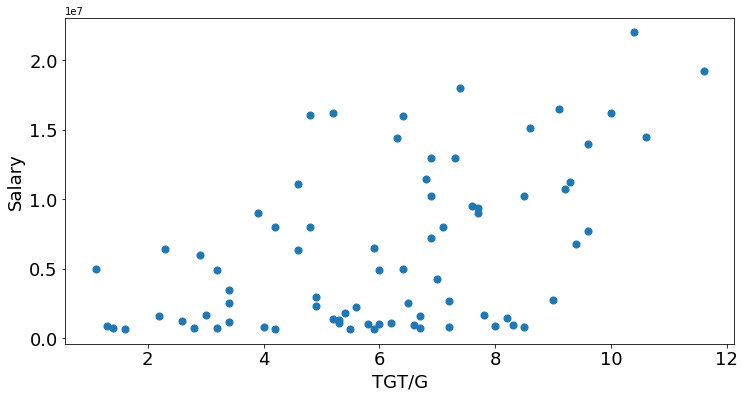

In [5]:
ax = wrs.plot(kind="scatter", x = 'TGT/G',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TGT/G', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['TGT/G', 'salary']])

In [7]:
X.mean(axis = 0)

array([-3.97342977e-16,  5.29547166e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.39337058, -0.68654498],
       [ 0.18006931, -0.73855574],
       [ 0.76954298,  0.62873552],
       [-0.45120399,  0.95106812],
       [ 1.49157416,  1.87361439]])

In [11]:
km.predict(X)

array([4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 1, 4, 1, 2, 1, 1, 1, 1, 2, 2, 2, 4,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,TGT/G,TGT/G_rank,salary,clusters
0,Michael Thomas,11.6,1.0,19250000,4
1,Davante Adams,10.6,2.0,14500000,4
2,Julio Jones,10.4,3.0,22000000,4
3,DeAndre Hopkins,10.0,4.0,16200000,4
4,Allen Robinson,9.6,5.5,14000000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.70588235e+00, 2.32202547e+06],
       [6.50000000e+00, 2.02497875e+06],
       [7.92142857e+00, 9.83392857e+06],
       [4.97777778e+00, 1.16748524e+07],
       [9.66250000e+00, 1.69437500e+07]])

In [14]:
wrs.groupby('clusters')[['TGT/G', 'salary']].mean()

,TGT/G,salary
clusters,,
0,2.705882,2.322025e+06
1,6.500000,2.024979e+06
2,7.921429,9.833929e+06
3,4.977778,1.167485e+07
4,9.662500,1.694375e+07


In [15]:
centroids = wrs.groupby('clusters')[['TGT/G', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

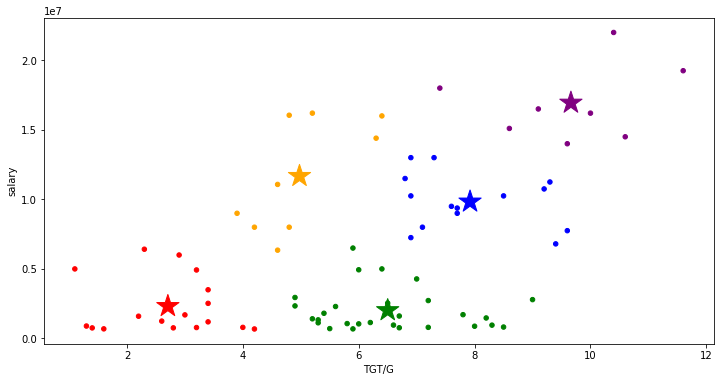

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

25.121156483681652

In [18]:
silhouette_score(X, km.labels_)

0.4513237050878542